In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import os

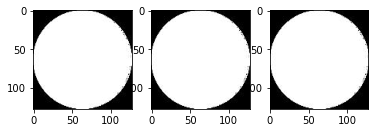

In [27]:
im1 = plt.imread("dataset/train_p/0101/0101104000.JPG")

plt.subplot(131)
plt.imshow(im1[:,:,0],'gray')
plt.subplot(132)
plt.imshow(im1[:,:,1],'gray')
plt.subplot(133)
plt.imshow(im1[:,:,2],'gray')

In [9]:
np.sum(im1[:,:,0] != im1[:,:,2])

0

In [10]:
im1[:,:,0].shape

(128, 128)

12851

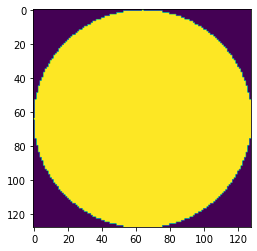

In [11]:
def create_circular_mask(h, w, center=None, radius=None):
    center = (int(w/2), int(h/2))
    #if radius is None: # use the smallest distance between the center and image walls
    radius = min(center[0], center[1], w-center[0], h-center[1])
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

mask = create_circular_mask(128, 128)
plt.imshow(mask)
np.sum(mask)

In [25]:
pred = []
for day in os.listdir("dataset/train_p"):
    for time in os.listdir("dataset/train_p/"+day):
        im = plt.imread("dataset/train_p/"+day+'/'+time)[:,:,0]
        pre = count_wb(im,12851)
        pred.append([pre,day+'_'+time[:-4]])
    
#pre , day, time[:-3]
        

In [26]:
import csv
  
# data to be written row-wise in csv fil
  
# opening the csv file in 'w+' mode
file = open('dataset/pred_cloud_cover.csv', 'w+', newline ='')
  
# writing the data into the file
with file:    
    write = csv.writer(file)
    write.writerows(pred)

In [15]:
def count_wb(im,c ):
    w=0
    b=0
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if(im[i,j]==0):
                b+=1
            else:
                w+=1
    return w/c

In [32]:
df = pd.read_csv('dataset/pred_cloud_cover.csv',header=None,names=['cc','time_stamp'])
df.head()

,cc,time_stamp
0,0.416310,0101_0101074000
1,0.692942,0101_0101075000
2,0.796203,0101_0101080000
3,0.709672,0101_0101081000
4,0.465489,0101_0101082000


In [33]:
df2 = pd.read_csv('dataset/train/train.csv')
df2.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,1/1,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,1/1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,1/1,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,1/1,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,1/1,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0


In [44]:
df2.columns

Index(['DATE (MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Tower RH [%]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]',
       'Station Pressure [mBar]', 'Precipitation (Accumulated) [mm]',
       'Snow Depth [cm]', 'Moisture', 'Albedo (CMP11)'],
      dtype='object')

In [53]:
import re


0101


In [58]:
#time col
df2['time'] = df2['MST'].str.replace(r'(\d*)\:(\d*)',r'\1\2',regex=True)

In [59]:
df2['time'].unique()

array(['0000', '0001', '0002', ..., '2357', '2358', '2359'], dtype=object)

In [56]:
#date col
dl = []
for i in range(len(df2)):

    m,d = re.findall(r'(\d*)\/(\d*)', df2.loc[i,'DATE (MM/DD)'])[0]
    if(len(m)==1):
        m = '0'+m
    if(len(d)==1):
        d = '0'+d
    dl.append(m+d)
df2['date'] = dl


In [97]:
df2['date']

0         0101
1         0101
2         0101
3         0101
4         0101
          ... 
527035    1231
527036    1231
527037    1231
527038    1231
527039    1231
Name: date, Length: 527040, dtype: object

In [98]:
new_df['date']

0        0101
1        0101
2        0101
3        0101
4        0101
         ... 
25211    1231
25212    1231
25213    1231
25214    1231
25215    1231
Name: date, Length: 25216, dtype: object

In [68]:
df2['time_stamp'] = df2['date']+'_'+df2['date']+df2['time']+'00'
df2['time_stamp'].head()

0    0101_0101000000
1    0101_0101000100
2    0101_0101000200
3    0101_0101000300
4    0101_0101000400
Name: time_stamp, dtype: object

In [69]:
len(df), len(df2)

(25251, 527040)

In [77]:
new_df = df.merge(df2, on=['time_stamp'], how='inner')
len(new_df)

25216

In [89]:
df2.groupby('DATE (MM/DD)')['MST']

In [95]:
df2[(df2['date']=='0202')][['MST','time']]

,MST,time
46080,00:00,0000
46081,00:01,0001
46082,00:02,0002
46083,00:03,0003
46084,00:04,0004
...,...,...
47515,23:55,2355
47516,23:56,2356
47517,23:57,2357
47518,23:58,2358


In [81]:
set(df['time_stamp']) - set(df2['time_stamp'])

{'0202_071000',
 '0202_072000',
 '0202_073000',
 '0202_074000',
 '0202_075000',
 '0202_080000',
 '0202_081000',
 '0202_082000',
 '0202_083000',
 '0202_084000',
 '0202_085000',
 '0202_090000',
 '0202_091000',
 '0202_092000',
 '0202_093000',
 '0202_094000',
 '0202_095000',
 '0623_062310',
 '1202_171000',
 '1202_172000',
 '1202_173000',
 '1202_174000',
 '1202_175000',
 '1202_180000',
 '1202_181000',
 '1202_182000',
 '1202_183000',
 '1202_184000',
 '1202_185000',
 '1202_190000',
 '1202_191000',
 '1202_192000',
 '1202_193000',
 '1202_194000',
 '1202_195000'}

In [78]:
new_df.head()

,cc,time_stamp,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],...,Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),date,time
0,0.416310,0101_0101074000,1/1,07:40,8.53993,1.078100,122.69154,7.202,1.503,-5.597,...,-1,2.20,195.9,802.352,0.0,0.070,0.0,0.1883,0101,0740
1,0.692942,0101_0101075000,1/1,07:50,20.59860,-0.143419,124.34405,6.646,1.306,-5.494,...,13,2.20,277.5,801.927,0.0,0.144,0.0,0.1758,0101,0750
2,0.796203,0101_0101080000,1/1,08:00,28.83560,0.825900,126.02976,8.660,2.480,-5.120,...,25,5.70,267.7,802.093,0.0,0.257,0.0,0.2118,0101,0800
3,0.709672,0101_0101081000,1/1,08:10,44.96360,4.401470,127.75072,9.210,2.811,-4.889,...,37,5.45,268.9,802.302,0.0,0.257,0.0,0.2146,0101,0810
4,0.465489,0101_0101082000,1/1,08:20,31.37320,0.583573,129.50890,9.610,3.002,-4.798,...,15,8.70,263.5,802.175,0.0,0.230,0.0,0.1984,0101,0820


In [10]:
df.columns

Index(['cc', 'time_stamp', 'DATE (MM/DD)', 'MST',
       'Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]',
       'Azimuth Angle [degrees]', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Peak Wind Speed @ 6ft [m/s]',
       'Avg Wind Direction @ 6ft [deg from N]', 'Station Pressure [mBar]',
       'Precipitation (Accumulated) [mm]', 'Snow Depth [cm]', 'Moisture',
       'Albedo (CMP11)', 'date', 'time'],
      dtype='object')

In [79]:
new_df.to_csv('dataset/cloud_use.csv', index=False)

In [266]:
df = pd.read_csv('dataset/cloud_use.csv')

In [24]:
consider.index

Int64Index([25160, 25161, 25162, 25163, 25164, 25165, 25166, 25167, 25168,
            25169, 25170, 25171, 25172, 25173, 25174, 25175, 25176, 25177,
            25178, 25179, 25180, 25181, 25182, 25183, 25184, 25185, 25186,
            25187, 25188, 25189, 25190, 25191, 25192, 25193, 25194, 25195,
            25196, 25197, 25198, 25199, 25200, 25201, 25202, 25203, 25204,
            25205, 25206, 25207, 25208, 25209, 25210, 25211, 25212, 25213,
            25214, 25215],
           dtype='int64')

In [20]:
consider.loc[:42]

,cc,time_stamp,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],...,Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),date,time,p30,p60,p90,p120
0,0.416310,0101_0101074000,1/1,07:40,8.53993,1.078100,122.69154,7.202,1.503,-5.597,...,0.0,0.070,0.0,0.1883,101,740,37.0,10.0,28.0,18.0
1,0.692942,0101_0101075000,1/1,07:50,20.59860,-0.143419,124.34405,6.646,1.306,-5.494,...,0.0,0.144,0.0,0.1758,101,750,15.0,14.0,12.0,59.0
2,0.796203,0101_0101080000,1/1,08:00,28.83560,0.825900,126.02976,8.660,2.480,-5.120,...,0.0,0.257,0.0,0.2118,101,800,18.0,25.0,13.0,81.0
3,0.709672,0101_0101081000,1/1,08:10,44.96360,4.401470,127.75072,9.210,2.811,-4.889,...,0.0,0.257,0.0,0.2146,101,810,10.0,28.0,18.0,92.0
4,0.465489,0101_0101082000,1/1,08:20,31.37320,0.583573,129.50890,9.610,3.002,-4.798,...,0.0,0.230,0.0,0.1984,101,820,14.0,12.0,59.0,95.0
5,0.457630,0101_0101083000,1/1,08:30,40.30760,1.923790,131.30618,8.930,2.771,-4.629,...,0.0,0.211,0.0,0.1829,101,830,25.0,13.0,81.0,95.0
6,0.419345,0101_0101084000,1/1,08:40,45.45340,20.914500,133.14433,9.250,2.870,-4.730,...,0.0,0.335,0.0,0.1929,101,840,28.0,18.0,92.0,96.0
7,0.376780,0101_0101085000,1/1,08:50,75.43850,84.205700,135.02497,9.690,3.130,-4.470,...,0.0,0.292,0.0,0.2284,101,850,12.0,59.0,95.0,97.0
8,0.479651,0101_0101090000,1/1,09:00,106.26000,137.297000,136.94958,10.090,3.383,-4.517,...,0.0,0.216,0.0,0.2366,101,900,13.0,81.0,95.0,96.0
9,0.536067,0101_0101091000,1/1,09:10,86.36340,63.891000,138.91943,9.870,3.166,-4.634,...,0.0,0.232,0.0,0.2220,101,910,18.0,92.0,96.0,96.0


In [223]:
import random
random.seed(1)


array([13])

In [267]:
X = []
Y = []
t = []
df.dropna(inplace=True)
for day in df['date'].unique():
    #print(day)
    consider = df[df['date']==day]
       #temp = consider.loc[consider.index[:60]]
    #tl = consider['p30'].notna()[::-1].idxmax()
    #print(day,len(consider))
    #print(tl)
    #print(consider.tail(20))
    if(len(consider)>41):
        si = np.random.choice(len(consider)-40,1) 
        tl = consider.index[si][0]
        #print(tl[0])
        
        xdf = consider.loc[tl:tl+39][['Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]',
       'Azimuth Angle [degrees]', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Peak Wind Speed @ 6ft [m/s]',
       'Avg Wind Direction @ 6ft [deg from N]', 'Station Pressure [mBar]',
       'Precipitation (Accumulated) [mm]', 'Snow Depth [cm]', 'Moisture',
       'Albedo (CMP11)']]
        #print(len(xdf))
        ydf = consider.loc[tl+39][['p30','p60','p90','p120']]
        X.append(np.array(xdf))
        Y.append(np.array(ydf))
        t.append(len(xdf))
    #print(temp)
    
#print(min(np.array(t)), len(t))
X = np.asarray(X).astype('float32')#np.array(X)
Y = np.asarray(Y).astype('float32')

In [268]:
X = np.asarray(X).astype('float32')#np.array(X)
Y = np.asarray(Y).astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [34]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [40]:
df_ = df.dropna()
#df_.isna().sum()
X_df = df_[['Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]',
       'Azimuth Angle [degrees]', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Peak Wind Speed @ 6ft [m/s]',
       'Avg Wind Direction @ 6ft [deg from N]', 'Station Pressure [mBar]',
       'Precipitation (Accumulated) [mm]', 'Snow Depth [cm]', 'Moisture',
       'Albedo (CMP11)']]
Y_df = df_[['p30','p60','p90','p120']]

In [244]:
Y

array([[  2.,   4.,   2.,  19.],
       [ 99.,  98.,  97.,  96.],
       [ 41.,   8.,   9.,   5.],
       [  9.,  17.,   8.,   7.],
       [ 43.,  86.,  86.,  92.],
       [ 88.,  61.,  32.,  -1.],
       [ 97.,  97.,  95.,  90.],
       [  6.,   7.,   8.,  28.],
       [ 98.,  97.,  97.,  97.],
       [  4.,   7.,   3.,  -1.],
       [ 10.,  16.,  11.,  12.],
       [ 96.,  97.,  62.,  -1.],
       [ 99.,  98.,  98.,  -1.],
       [ 15.,   9.,   5.,   4.],
       [ 11.,  28.,  35.,  33.],
       [  8.,  12.,  10.,   6.],
       [ 67.,  68.,  84.,  82.],
       [ 80.,  99.,  98.,  95.],
       [ 96.,  95.,  97.,  88.],
       [ 11.,   8.,   8.,   1.],
       [ 91.,  88.,  82.,  65.],
       [  9.,   6.,  11.,   9.],
       [ 76.,  59.,  64.,  64.],
       [ 55.,  55.,  15.,   1.],
       [ 94.,  96.,  93.,  85.],
       [ 16.,  30.,  39.,  34.],
       [ 14.,   7.,  10.,   7.],
       [ 27.,  34.,  59.,  27.],
       [100.,  93.,  97.,  97.],
       [ 98.,  98.,  98.,  98.],
       [ 2

In [245]:
X[:,:,7]

array([[ 5.,  6.,  5., ...,  3.,  3.,  4.],
       [16., 44., 64., ..., 98., 97., 98.],
       [71., 94., 98., ..., 71., 65., 43.],
       ...,
       [24., 26., 23., ..., 14., 14., 12.],
       [14., 10., 18., ..., 13., 16., 18.],
       [16., 14., 12., ..., 11., 11., 16.]], dtype=float32)

In [246]:
Y

array([[  2.,   4.,   2.,  19.],
       [ 99.,  98.,  97.,  96.],
       [ 41.,   8.,   9.,   5.],
       [  9.,  17.,   8.,   7.],
       [ 43.,  86.,  86.,  92.],
       [ 88.,  61.,  32.,  -1.],
       [ 97.,  97.,  95.,  90.],
       [  6.,   7.,   8.,  28.],
       [ 98.,  97.,  97.,  97.],
       [  4.,   7.,   3.,  -1.],
       [ 10.,  16.,  11.,  12.],
       [ 96.,  97.,  62.,  -1.],
       [ 99.,  98.,  98.,  -1.],
       [ 15.,   9.,   5.,   4.],
       [ 11.,  28.,  35.,  33.],
       [  8.,  12.,  10.,   6.],
       [ 67.,  68.,  84.,  82.],
       [ 80.,  99.,  98.,  95.],
       [ 96.,  95.,  97.,  88.],
       [ 11.,   8.,   8.,   1.],
       [ 91.,  88.,  82.,  65.],
       [  9.,   6.,  11.,   9.],
       [ 76.,  59.,  64.,  64.],
       [ 55.,  55.,  15.,   1.],
       [ 94.,  96.,  93.,  85.],
       [ 16.,  30.,  39.,  34.],
       [ 14.,   7.,  10.,   7.],
       [ 27.,  34.,  59.,  27.],
       [100.,  93.,  97.,  97.],
       [ 98.,  98.,  98.,  98.],
       [ 2

In [199]:
xdf.head()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
25164,101.086,613.244,127.78574,-0.557,-3.907,-9.707,45.65,9,1.95,296.9,811.577,0.0,3.280,0.0,0.6483
25165,114.725,591.233,129.54412,0.458,-3.100,-9.200,44.11,8,0.00,0.0,811.657,0.0,3.068,0.0,0.6084
25166,155.975,734.728,131.34161,1.793,-2.267,-8.867,41.26,6,0.00,0.0,811.764,0.0,2.703,0.0,0.5638
25167,182.723,765.239,133.17998,0.911,-2.901,-9.301,42.31,7,0.00,0.0,812.061,0.0,2.808,0.0,0.5418
25168,209.775,798.264,135.06083,1.719,-2.363,-9.163,40.41,4,0.00,0.0,812.139,0.0,2.705,0.0,0.5384


In [269]:
X.shape

(346, 40, 15)

In [265]:
X[-1,:,7]

array([-1.,  1.,  1.,  9.,  8.,  6.,  7.,  4.,  5.,  7.,  6.,  6., 10.,
        7.,  7.,  7., 10.,  8.,  9., 12.,  7.,  7.,  9., 10.,  5., 12.,
       15.,  8.,  9., 10., 13.,  8., 27., 36., 64., 75., 81., 67., 41.,
       22.], dtype=float32)

In [270]:
ws = np.reshape(X[:,-1,8],(346,1))
wd = np.reshape(X[:,-1,9],(346,1))
cmp = np.reshape(X[:,-1,0],(346,1))
nip = np.reshape(X[:,-1,1],(346,1))
azi = np.reshape(X[:,-1,2],(346,1))
dry = np.reshape(X[:,-1,3],(346,1))
wet = np.reshape(X[:,-1,4],(346,1))
dew = np.reshape(X[:,-1,5],(346,1))
rh = np.reshape(X[:,-1,6],(346,1))
pres = np.reshape(X[:,-1,10],(346,1))
cmp11 = pres = np.reshape(X[:,-1,-1],(346,1))
X = np.concatenate((X[:,:,7] ,ws,wd,cmp),axis=1)


In [250]:
X[:,:,7].shape

(246, 31)

In [168]:
np.reshape(X[:,-1,9],(350,1))##.shape

array([[251.3 ],
       [296.1 ],
       [261.7 ],
       [152.3 ],
       [ 35.16],
       [281.9 ],
       [ 85.2 ],
       [278.5 ],
       [ 79.27],
       [ 63.01],
       [142.1 ],
       [259.9 ],
       [290.9 ],
       [257.2 ],
       [333.1 ],
       [ 65.72],
       [265.  ],
       [ 45.45],
       [112.  ],
       [ 44.16],
       [  0.  ],
       [289.5 ],
       [120.6 ],
       [ 42.97],
       [282.  ],
       [129.1 ],
       [ 42.76],
       [120.9 ],
       [ 77.65],
       [ 58.35],
       [280.1 ],
       [285.8 ],
       [ 29.87],
       [ 23.23],
       [  0.  ],
       [306.6 ],
       [169.3 ],
       [304.1 ],
       [102.6 ],
       [167.4 ],
       [162.5 ],
       [249.3 ],
       [158.9 ],
       [ 31.5 ],
       [298.3 ],
       [105.1 ],
       [140.4 ],
       [206.1 ],
       [ 27.71],
       [147.4 ],
       [191.8 ],
       [ 24.1 ],
       [ 30.88],
       [328.2 ],
       [ 34.32],
       [285.5 ],
       [291.1 ],
       [162.5 ],
       [143.3 

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [238]:
X_train

array([[73., 78., 77., ..., 86., 97., 95.],
       [17., 16., 18., ..., 46., 53., 54.],
       [83., 93., 96., ..., 98., 96., 98.],
       ...,
       [97., 96., 98., ..., 85., 75., 84.],
       [ 7.,  8.,  9., ..., 10.,  9., 11.],
       [40., 33., 35., ..., 30., 25., 22.]], dtype=float32)

In [236]:
X_test.shape, X_train.shape

((50, 31), (196, 31))

In [272]:


normalizer = tf.keras.layers.Normalization(axis=-1)
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(15, activation='relu'),
    layers.Dropout(0.7),
    layers.Dense(10, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(15, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(20, activation='relu'),
    layers.Dense(units=4)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.005),
    loss='mean_absolute_error')



history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

pred = linear_model.predict(X_test)
p = []
for s in pred:
    ps = []
    for e in s:
        if(e>0):
            ps.append(e)
        else:
            ps.append(-1)
    p.append(ps)
    
mae = linear_model.evaluate(X_test, y_test, verbose=1)
#print(y_test)
print('MAE: ',mae)

Epoch 1/100
7/7 [==============================] - 1s 49ms/step - loss: 52.2706 - val_loss: 55.2951
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 51.8230 - val_loss: 54.9066
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 51.2591 - val_loss: 54.3436
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 50.2570 - val_loss: 53.0048
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 48.8211 - val_loss: 50.8377
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 46.3286 - val_loss: 47.3919
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 44.2821 - val_loss: 43.1708
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 40.9839 - val_loss: 38.4465
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 36.3732 - val_loss: 34.8138
Epoch 10/100
7/7 [==============================] - 0s 9ms/step - loss: 37.4805 - val_loss: 32.1978
E

7/7 [==============================] - 0s 12ms/step - loss: 34.1976 - val_loss: 36.1912
Epoch 83/100
7/7 [==============================] - 0s 12ms/step - loss: 34.6836 - val_loss: 35.9244
Epoch 84/100
7/7 [==============================] - 0s 11ms/step - loss: 34.4699 - val_loss: 35.8744
Epoch 85/100
7/7 [==============================] - 0s 11ms/step - loss: 33.2160 - val_loss: 35.6011
Epoch 86/100
7/7 [==============================] - 0s 11ms/step - loss: 34.0418 - val_loss: 35.5974
Epoch 87/100
7/7 [==============================] - 0s 11ms/step - loss: 33.4597 - val_loss: 35.4524
Epoch 88/100
7/7 [==============================] - 0s 11ms/step - loss: 32.2898 - val_loss: 35.1784
Epoch 89/100
7/7 [==============================] - 0s 11ms/step - loss: 32.1512 - val_loss: 34.9064
Epoch 90/100
7/7 [==============================] - 0s 11ms/step - loss: 34.0920 - val_loss: 34.9993
Epoch 91/100
7/7 [==============================] - 0s 12ms/step - loss: 33.3713 - val_loss: 35.3371
Epo

In [260]:
np.mean(np.abs(p-y_test),axis=0)

array([30.54206 , 31.3219  , 28.783716, 30.366192], dtype=float32)

In [240]:
p

[[53.55805, 53.746284, 51.59835, 50.644375],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.247288, 53.154274, 50.060432, 48.658215],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [55.345333, 55.853622, 51.514397, 51.58434],
 [58.915432, 57.984596, 54.89353, 53.973316],
 [57.015343, 57.655037, 55.074196, 52.87055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.24673, 53.15386, 50.061058, 48.657646],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.246113, 53.15329, 50.06009, 48.657055],
 [52.

In [241]:
y_test

array([[ 9.900e+01,  8.700e+01,  9.900e+01,  9.800e+01],
       [ 8.100e+01,  9.200e+01,  6.100e+01,  7.200e+01],
       [ 1.600e+01,  1.600e+01,  6.000e+00,  9.000e+00],
       [ 8.900e+01,  9.300e+01,  9.400e+01,  9.100e+01],
       [ 4.000e+01, -7.999e+03,  6.300e+01,  3.000e+01],
       [ 4.300e+01,  2.700e+01,  4.900e+01,  9.700e+01],
       [ 2.300e+01,  5.300e+01,  5.900e+01,  8.200e+01],
       [ 1.500e+01,  1.800e+01,  1.200e+01,  9.000e+00],
       [ 1.000e+01, -7.999e+03,  2.200e+01,  7.900e+01],
       [ 9.700e+01,  8.500e+01,  9.500e+01,  9.800e+01],
       [ 6.000e+00,  1.000e+01,  7.000e+00,  1.000e+00],
       [ 8.300e+01,  7.700e+01,  7.200e+01,  6.300e+01],
       [ 8.400e+01,  9.300e+01,  1.000e+02,  7.100e+01],
       [ 5.900e+01,  5.500e+01,  2.100e+01,  5.900e+01],
       [-7.999e+03,  9.400e+01,  9.400e+01,  9.200e+01],
       [ 8.000e+00,  7.000e+00,  9.000e+00,  2.400e+01],
       [ 9.900e+01,  9.800e+01,  9.900e+01,  9.900e+01],
       [ 3.700e+01,  7.200e+01,

In [26]:
p30 = []
p60 = []
p90 = []
p120 = []
for day in df['date'].unique():
    #print(day)
    consider = df[df['date']==day]
    
    for i in consider.index:
        #print(i, consider.loc[i]['time_stamp'])
        if(i+12<=consider.index[-1]):
            #print(consider.loc[i]['time'])#,len(consider))
            #print(consider.loc[i+3]['time'],consider.loc[i+6]['time'], consider.loc[i+9]['time'], consider.loc[i+12]['time'])
            p30.append(consider.loc[i+3]['Total Cloud Cover [%]'])
            p60.append(consider.loc[i+6]['Total Cloud Cover [%]'])
            p90.append(consider.loc[i+9]['Total Cloud Cover [%]'])
            p120.append(consider.loc[i+12]['Total Cloud Cover [%]'])
        else:
            p30.append(np.nan)
            p60.append(np.nan)
            p90.append(np.nan)
            p120.append(np.nan)
    
            
df['p30'] = p30
df['p60'] = p60
df['p90'] = p90
df['p120'] = p120

In [ ]:
len(df), len(df['p30'])

In [27]:
df.to_csv('dataset/cloud_use.csv', index=False)

In [9]:
consider.tail()

,cc,time_stamp,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],...,Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),date,time
50,0.251654,0101_0101160000,1/1,16:00,52.82090,223.347000,232.55581,7.617,0.928,-8.372,...,2,4.70,299.8,802.082,0.0,0.313,0.0,0.2006,101,1600
51,0.252899,0101_0101161000,1/1,16:10,55.24320,353.585000,234.27191,7.398,0.669,-9.131,...,2,7.70,296.9,802.181,0.0,0.348,0.0,0.2642,101,1610
52,0.244261,0101_0101162000,1/1,16:20,17.88770,2.161170,235.95312,6.645,0.255,-8.945,...,1,9.45,312.8,802.200,0.0,0.398,0.0,0.1101,101,1620
53,0.233834,0101_0101163000,1/1,16:30,11.31020,-0.361020,237.60149,6.136,0.109,-8.391,...,-1,8.70,298.5,802.182,0.0,0.345,0.0,0.0839,101,1630
54,0.217726,0101_0101164000,1/1,16:40,6.38637,-0.356075,239.21914,5.675,0.047,-7.953,...,-1,3.70,270.4,802.449,0.0,0.377,0.0,0.0000,101,1640


In [63]:
new_df = pd.DataFrame()
for i in range(len(df)):
    ts = df.loc[i,'time_stamp']
    day = ts[:4]
    time = ts[-6:-2]
    break
day,time

('0101', '0740')

In [75]:
df2.dtypes

DATE (MM/DD)                              object
MST                                       object
Global CMP22 (vent/cor) [W/m^2]          float64
Direct sNIP [W/m^2]                      float64
Azimuth Angle [degrees]                  float64
Tower Dry Bulb Temp [deg C]              float64
Tower Wet Bulb Temp [deg C]              float64
Tower Dew Point Temp [deg C]             float64
Tower RH [%]                             float64
Total Cloud Cover [%]                      int64
Peak Wind Speed @ 6ft [m/s]              float64
Avg Wind Direction @ 6ft [deg from N]    float64
Station Pressure [mBar]                  float64
Precipitation (Accumulated) [mm]         float64
Snow Depth [cm]                          float64
Moisture                                 float64
Albedo (CMP11)                           float64
date                                      object
time                                      object
time_stamp                                object
dtype: object

In [74]:
df = df.astype({'time_stamp': 'str'})
df2 = df2.astype({'time_stamp': 'str'})

In [66]:
df2.loc[(df2['time'] == time) & (df2['date']==day)]+df.loc[0]

,Albedo (CMP11),Avg Wind Direction @ 6ft [deg from N],Azimuth Angle [degrees],DATE (MM/DD),Direct sNIP [W/m^2],Global CMP22 (vent/cor) [W/m^2],MST,Moisture,Peak Wind Speed @ 6ft [m/s],Precipitation (Accumulated) [mm],...,Station Pressure [mBar],Total Cloud Cover [%],Tower Dew Point Temp [deg C],Tower Dry Bulb Temp [deg C],Tower RH [%],Tower Wet Bulb Temp [deg C],cc,date,time,time_stamp
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
new_df.append(df2.loc[(df2['time'] == time) & (df2['date']==day)])
new_df.head()

""


In [ ]:
#('0101', '0740')
    ts = df.loc[i,'time_stamp']
    day = ts[:4]
    time = ts[-6:-2]
    break
day,time

In [ ]:
# read train.csv
#sample according to timestamp